In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#  import stock data (csv)
adjOpen = pd.read_csv('stocks-us-adjOpen.csv')
adjClose = pd.read_csv('stocks-us-adjClose.csv')
volume = pd.read_csv('stocks-us-Volume.csv')
adjHigh = pd.read_csv('stocks-us-adjHigh.csv')
adjLow = pd.read_csv('stocks-us-adjLow.csv')

# use pd.melt to rearrange to dataframe rows of (date,ticker,value)

In [3]:
adjClose_melt = pd.melt(adjClose,id_vars=['compiled from Yahoo! Finance data by Matt Borthwick'],var_name='Ticker',value_name='Close')
adjOpen_melt = pd.melt(adjOpen,id_vars=['compiled from Yahoo! Finance data by Matt Borthwick'],var_name='Ticker',value_name='Open')
adjHigh_melt = pd.melt(adjClose,id_vars=['compiled from Yahoo! Finance data by Matt Borthwick'],var_name='Ticker',value_name='High')
adjLow_melt = pd.melt(adjOpen,id_vars=['compiled from Yahoo! Finance data by Matt Borthwick'],var_name='Ticker',value_name='Low')
volume_melt = pd.melt(adjClose,id_vars=['compiled from Yahoo! Finance data by Matt Borthwick'],var_name='Ticker',value_name='Volume')

In [4]:
# rename data and stock symbol column
adjClose_melt.columns = ['Date','Symbol','Close']
adjOpen_melt.columns = ['Date','Symbol','Open']
adjHigh_melt.columns = ['Date','Symbol','High']
adjLow_melt.columns = ['Date','Symbol','Low']
volume_melt.columns = ['Date','Symbol','Volume']

In [5]:
volume_melt.head()

,Date,Symbol,Volume
0,1970-01-02,ED,0.307997
1,1970-01-05,ED,0.320831
2,1970-01-06,ED,0.316553
3,1970-01-07,ED,0.312275
4,1970-01-08,ED,0.312275


In [6]:
adjClose_melt.head()

,Date,Symbol,Close
0,1970-01-02,ED,0.307997
1,1970-01-05,ED,0.320831
2,1970-01-06,ED,0.316553
3,1970-01-07,ED,0.312275
4,1970-01-08,ED,0.312275


In [7]:
adjOpen_melt.head()

,Date,Symbol,Open
0,1970-01-02,ED,0.292312
1,1970-01-05,ED,0.310850
2,1970-01-06,ED,0.320831
3,1970-01-07,ED,0.315127
4,1970-01-08,ED,0.312275


# outer (union) merge each data set, by (Date,Symbol)

In [8]:
merge_OpenClose = pd.merge(adjOpen_melt,adjClose_melt,how='outer',left_on=['Date','Symbol'],right_on=['Date','Symbol'])
merge_High = pd.merge(merge_OpenClose,adjHigh_melt,how='outer',left_on=['Date','Symbol'],right_on=['Date','Symbol'])
merge_Low = pd.merge(merge_High,adjLow_melt,how='outer',left_on=['Date','Symbol'],right_on=['Date','Symbol'])
Stock_Data = pd.merge(merge_Low,volume_melt,how='outer',left_on=['Date','Symbol'],right_on=['Date','Symbol'])

In [9]:
Stock_Data.head()

,Date,Symbol,Open,Close,High,Low,Volume
0,1970-01-02,ED,0.292312,0.307997,0.307997,0.292312,0.307997
1,1970-01-05,ED,0.310850,0.320831,0.320831,0.310850,0.320831
2,1970-01-06,ED,0.320831,0.316553,0.316553,0.320831,0.316553
3,1970-01-07,ED,0.315127,0.312275,0.312275,0.315127,0.312275
4,1970-01-08,ED,0.312275,0.312275,0.312275,0.312275,0.312275


In [10]:
Stock_Data.shape

(8542720, 7)

# pd.to_datetime

In [11]:
Stock_Data['Date'] = pd.to_datetime(Stock_Data['Date'])

In [12]:
Stock_Data['Date'][0].weekday_name

'Friday'

In [13]:
Stock_Data['Date'][0].month

1

In [14]:
Stock_Data['Date'][0].year

1970

In [15]:
Stock_Data['Date'][10].quarter

1

In [16]:
#  VERY SLOW
#Stock_Data['Day'] = Stock_Data.apply(lambda df: df['Date'].day,axis=1)

## Add extra Datetime columns

In [17]:
Stock_Data['Year'] = pd.DatetimeIndex(Stock_Data['Date']).year
Stock_Data['Day'] = pd.DatetimeIndex(Stock_Data['Date']).day
Stock_Data['Weekday'] = pd.DatetimeIndex(Stock_Data['Date']).weekday_name
Stock_Data['Month'] = pd.DatetimeIndex(Stock_Data['Date']).month
Stock_Data['Quarter'] = pd.DatetimeIndex(Stock_Data['Date']).quarter

In [18]:
Stock_Data.head()

,Date,Symbol,Open,Close,High,Low,Volume,Year,Day,Weekday,Month,Quarter
0,1970-01-02,ED,0.292312,0.307997,0.307997,0.292312,0.307997,1970,2,Friday,1,1
1,1970-01-05,ED,0.310850,0.320831,0.320831,0.310850,0.320831,1970,5,Monday,1,1
2,1970-01-06,ED,0.320831,0.316553,0.316553,0.320831,0.316553,1970,6,Tuesday,1,1
3,1970-01-07,ED,0.315127,0.312275,0.312275,0.315127,0.312275,1970,7,Wednesday,1,1
4,1970-01-08,ED,0.312275,0.312275,0.312275,0.312275,0.312275,1970,8,Thursday,1,1


#  List of Stock Symbols

In [19]:
Stock_Data['Symbol'].unique()

array(['ED', 'DD', 'CVX', 'FL', 'CAT', 'IP', 'SJW', 'F', 'LLY', 'AVP',
       'NFG', 'BF-A', 'MATX', 'BK', 'SNE', 'KR', 'BP', 'C', 'CL', 'APA',
       'DDS', 'TSN', 'OII', 'BIF', 'LAWS', 'GWW', 'JCP', 'VNO', 'LPX',
       'WABC', 'NWLI', 'GLT', 'LUB', 'NL', 'PGR', 'BF-B', 'ADI', 'GHC',
       'GFI', 'SJI', 'SHLM', 'BAC', 'CTS', 'MAT', 'AP', 'WGO', 'MYL',
       'TRC', 'GIS', 'TMO', 'VLGEA', 'DUK', 'JPM', 'AGYS', 'L', 'BDX', 'D',
       'TGNA', 'IR', 'CAL', 'MSEX', 'NJR', 'ANAT', 'KMT', 'SENEB', 'WMK',
       'AEM', 'KMB', 'CHD', 'DHR', 'AVA', 'FUL', 'BBT', 'FHN', 'INTC',
       'KSU', 'CTG', 'KYO', 'MUX', 'MOG-A', 'CSX', 'CECE', 'SEIC', 'PHIIK',
       'NVO', 'COP', 'IFF', 'SLB', 'HUM', 'OXY', 'VLO', 'HRS', 'SO', 'THC',
       'IHC', 'VBF', 'CVBF', 'RDC', 'FMBI', 'TRST', 'ASNA', 'LM', 'PAYX',
       'SLM', 'AXE', 'SGMS', 'CB', 'JCI', 'SWK', 'NVR', 'ROST', 'JKHY',
       'CBU', 'STKL', 'MSFT', 'HVT-A', 'CY', 'BDN', 'VIVO', 'FISV', 'UNM',
       'TWN', 'EQC', 'MMT', 'CMU', 'FUN', 'FBNC',

In [20]:
Stock_Data[Stock_Data['Symbol']=='INTC'].tail()

,Date,Symbol,Open,Close,High,Low,Volume,Year,Day,Weekday,Month,Quarter
902395,2017-09-01,INTC,35.240002,35.090000,35.090000,35.240002,35.090000,2017,1,Friday,9,3
902396,2017-09-05,INTC,35.020000,35.020000,35.020000,35.020000,35.020000,2017,5,Tuesday,9,3
902397,2017-09-06,INTC,35.220001,35.759998,35.759998,35.220001,35.759998,2017,6,Wednesday,9,3
902398,2017-09-07,INTC,35.880001,35.540001,35.540001,35.880001,35.540001,2017,7,Thursday,9,3
902399,2017-09-08,INTC,35.419998,35.189999,35.189999,35.419998,35.189999,2017,8,Friday,9,3


# Plot Closing Price Stock data for one symbol

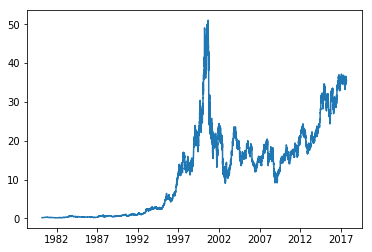

In [21]:
plt.plot(Stock_Data[Stock_Data['Symbol']=='INTC']['Date'],Stock_Data[Stock_Data['Symbol']=='INTC']['Close'])

In [22]:
Stock_Data[Stock_Data['Quarter']==3]['Close'].head()

126    0.270891
127    0.272348
128    0.269435
129    0.270891
130    0.275261
Name: Close, dtype: float64

# Visualizing date/time using box plots

(-2, 55)

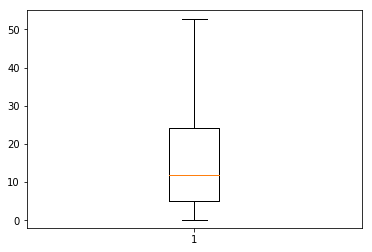

In [23]:
plt.boxplot(Stock_Data[Stock_Data['Quarter']==3]['Close'].dropna(),showfliers=False)
plt.ylim(-2,55)

In [24]:
Q1_close = Stock_Data[Stock_Data['Quarter']==1]['Close'].dropna()
Q2_close = Stock_Data[Stock_Data['Quarter']==2]['Close'].dropna()
Q3_close = Stock_Data[Stock_Data['Quarter']==3]['Close'].dropna()
Q4_close = Stock_Data[Stock_Data['Quarter']==4]['Close'].dropna()
#Q_series = pd.Series([Q1_close,Q2_close,Q3_close,Q4_close])

In [25]:
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

In [26]:
Q1_close.describe() # (count,mean,std,25%,50%,75%,max) = (0,1,..,6) 

count    776337.000000
mean         26.341519
std         103.608213
min           0.000419
25%           4.928636
50%          11.569202
75%          23.852758
max        5788.069336
Name: Close, dtype: float64

In [27]:
Q1_close.median()

11.569202

In [28]:
Q1_close.describe().values

array([  7.76337000e+05,   2.63415194e+01,   1.03608213e+02,
         4.19000000e-04,   4.92863600e+00,   1.15692020e+01,
         2.38527580e+01,   5.78806934e+03])

In [29]:
Q_stats = pd.DataFrame(0,['median','mean','std','min','%25','%50','%75','max'],['Q1','Q2','Q3','Q4'])
Q_stats

,Q1,Q2,Q3,Q4
median,0,0,0,0
mean,0,0,0,0
std,0,0,0,0
min,0,0,0,0
%25,0,0,0,0
%50,0,0,0,0
%75,0,0,0,0
max,0,0,0,0


In [30]:
def sumstats (df):
    return df.describe().values

#Q_stats['Q1']=Q1_close.describe().values
Q_stats['Q1'] = sumstats(Q1_close)
Q_stats['Q2'] = sumstats(Q2_close)
Q_stats['Q3'] = sumstats(Q3_close)
Q_stats['Q4'] = sumstats(Q4_close)

Q_stats['Q1'][0] = Q1_close.median()
Q_stats['Q2'][0] = Q2_close.median()
Q_stats['Q3'][0] = Q3_close.median()
Q_stats['Q4'][0] = Q4_close.median()

In [31]:
Q_stats

,Q1,Q2,Q3,Q4
median,11.569202,11.907418,11.829721,11.387355
mean,26.341519,26.773451,26.354822,25.333539
std,103.608213,105.022043,106.547942,100.543457
min,0.000419,0.000448,0.000510,0.000468
%25,4.928636,5.079390,5.066141,4.818582
%50,11.569202,11.907418,11.829721,11.387355
%75,23.852758,24.392376,24.150000,23.350000
max,5788.069336,6845.923828,6902.833496,6298.026855


Text(0,0.5,'Close Price')

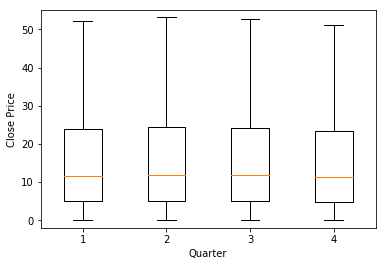

In [32]:
plt.boxplot([Q1_close,Q2_close,Q3_close,Q4_close],showfliers=False)
plt.ylim(-2,55)
plt.xlabel('Quarter')
plt.ylabel('Close Price')

(0, 55)

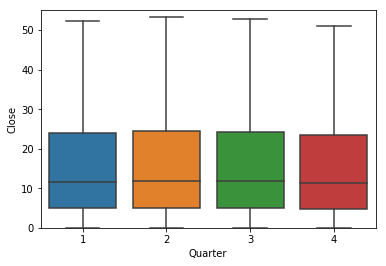

In [33]:
sns.boxplot(x=Stock_Data['Quarter'],y=Stock_Data['Close'],data=Stock_Data,showfliers=False)
plt.ylim(0,55)

(0, 55)

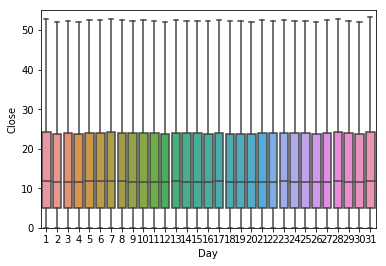

In [34]:
sns.boxplot(x=Stock_Data['Day'],y=Stock_Data['Close'],data=Stock_Data,showfliers=False)
plt.ylim(0,55)

(0, 55)

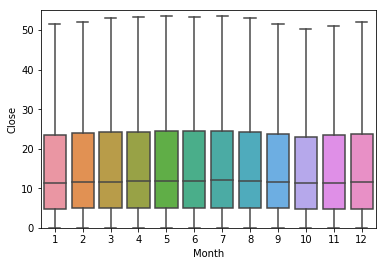

In [35]:
sns.boxplot(x=Stock_Data['Month'],y=Stock_Data['Close'],data=Stock_Data,showfliers=False)
plt.ylim(0,55)

(0, 55)

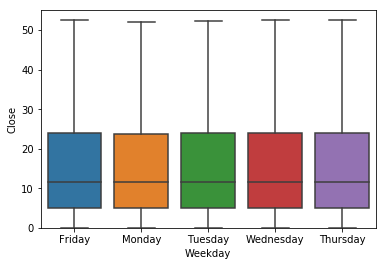

In [36]:
sns.boxplot(x=Stock_Data['Weekday'],y=Stock_Data['Close'],data=Stock_Data,showfliers=False)
plt.ylim(0,55)